In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
fh = pd.read_csv('https://raw.githubusercontent.com/naseemdabiran/CIS_9660/main/fetal_health.csv')

In [3]:
fh.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [78]:
fh.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [79]:
fh.isnull().sum()
# The dataset does not have any null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [80]:
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [81]:
# Drop mean and histogram columns -- unsure of what it measures 
fh.drop(['mean_value_of_long_term_variability', 'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks','histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean','histogram_median', 'histogram_variance', 'histogram_tendency'],  axis = 1, inplace = True)

Text(0.5, 0.98, 'Facet Grid showing Uterine Contractions vs Fetal Movement')

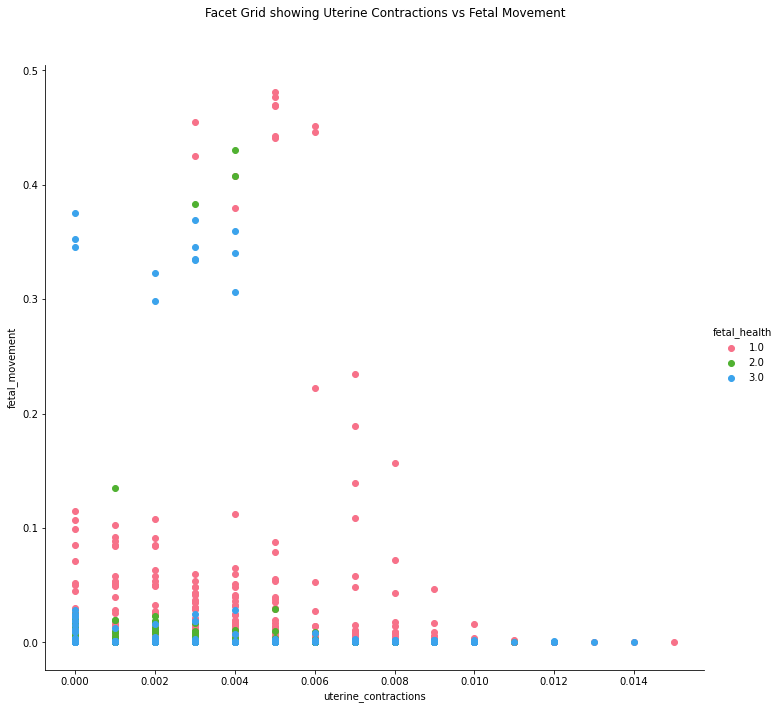

In [82]:
# Facet Grid of Uterine Contractions vs Fetal Movement  
rp=sns.FacetGrid(fh, hue='fetal_health', palette='husl', height=10).map(plt.scatter, 'uterine_contractions','fetal_movement').add_legend()
rp.fig.subplots_adjust(top=0.9) 
rp.fig.suptitle('Facet Grid showing Uterine Contractions vs Fetal Movement')

# Fetal Health
# 1 is Normal
# 2 is Suspect
# 3 is Pathological

[Text(0.5, 1.0, 'Violinplot showing Fetal Health vs Prolongued Decelerations')]

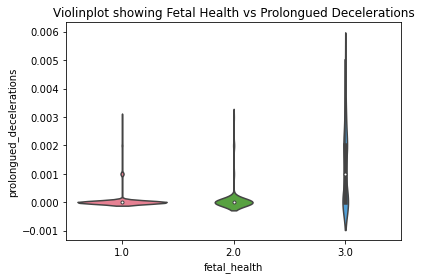

In [83]:
# Violin Plot of Fetal Health vs Prolongued Decelerations
sns.violinplot(x='fetal_health', y='prolongued_decelerations', palette='husl', data=fh).set(title='Violinplot showing Fetal Health vs Prolongued Decelerations')

# Fetal Health
# 1 is Normal
# 2 is Suspect
# 3 is Pathological

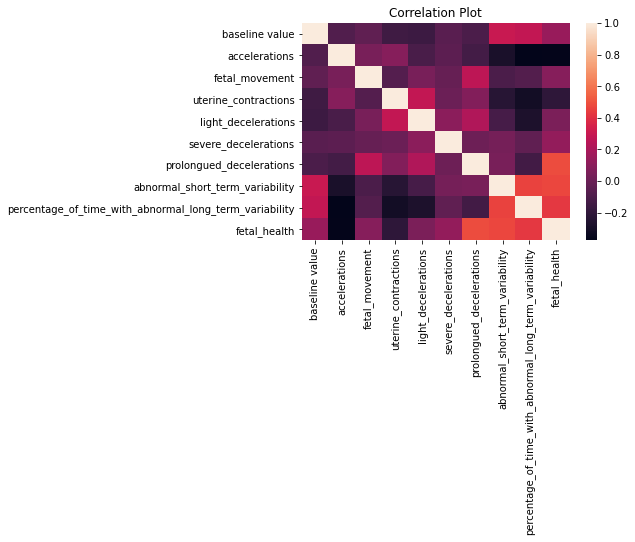

In [84]:
# Correlation Plot
sns.heatmap(fh.corr())
plt.title('Correlation Plot')
plt.show()

In [85]:
# Splitting the dataset into features and targets sets
X = fh.drop(['fetal_health'], axis = 1)
y = fh['fetal_health']

In [142]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [143]:
# Standardizing Data - Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [144]:
# Fitting the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Most of the data is continuous data so I chose to use a Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [145]:
# 5 Fold Cross Validation - KNN 
k = 5
kf = KFold(n_splits=k)

result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.8951551307256006


In [146]:
# 5 Fold Cross Validation - GNB 
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.7016699432806816


In [147]:
# Predicting the Test set results - KNN
y_pred_knn = knn.predict(X_test)

In [148]:
# Predicting the Test set results - GNB
y_pred_gnb = gnb.predict(X_test)

In [149]:
# Classification Report - KNN
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       494
         2.0       0.72      0.62      0.66        86
         3.0       0.92      0.78      0.84        58

    accuracy                           0.90       638
   macro avg       0.85      0.79      0.82       638
weighted avg       0.90      0.90      0.90       638



In [150]:
# Classification Report - GNB
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         1.0       0.98      0.62      0.76       494
         2.0       0.28      0.94      0.43        86
         3.0       0.67      0.41      0.51        58

    accuracy                           0.64       638
   macro avg       0.64      0.66      0.57       638
weighted avg       0.86      0.64      0.69       638

